# Instantiating the VGG16 convolutional base

In [1]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Freezing all layers up to a specific one


In [3]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Fine-tuning the model

In [17]:
train_dir ='E:/CAT AND DOG/train'
validation_dir ='E:/CAT AND DOG/validation' 
test_dir = 'E:/CAT AND DOG/test'

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=10,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=10,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-5),
            metrics=['acc'])

In [23]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=50,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=25)

Epoch 1/30
50/50 [==============================] - 498s 10s/step - loss: 0.6447 - acc: 0.6380 - val_loss: 0.5214 - val_acc: 0.7960
Epoch 2/30
50/50 [==============================] - 481s 10s/step - loss: 0.5476 - acc: 0.7260 - val_loss: 0.4181 - val_acc: 0.8480
Epoch 3/30
50/50 [==============================] - 470s 9s/step - loss: 0.4762 - acc: 0.7680 - val_loss: 0.3321 - val_acc: 0.8680
Epoch 4/30
50/50 [==============================] - 469s 9s/step - loss: 0.4268 - acc: 0.8000 - val_loss: 0.3446 - val_acc: 0.8360
Epoch 5/30
50/50 [==============================] - 468s 9s/step - loss: 0.3576 - acc: 0.8460 - val_loss: 0.2961 - val_acc: 0.8760
Epoch 6/30
50/50 [==============================] - 466s 9s/step - loss: 0.3210 - acc: 0.8480 - val_loss: 0.3999 - val_acc: 0.8120
Epoch 7/30
50/50 [==============================] - 468s 9s/step - loss: 0.3436 - acc: 0.8400 - val_loss: 0.2764 - val_acc: 0.8840
Epoch 8/30
50/50 [==============================] - 471s 9s/step - loss: 0.3420 -

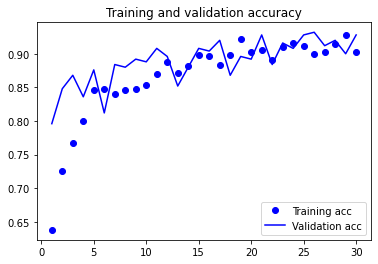

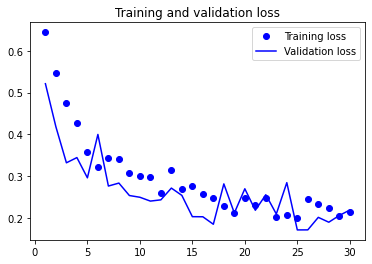

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()